In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Some tensorflow warnings in the pipeline we inspect
from mlinspect.utils import get_project_root

from mlinspect import PipelineInspector
from mlinspect.inspections import MaterializeFirstOutputRows

EXAMPLE_PIPELINE = os.path.join(str(get_project_root()), "features", "explainability", "example_pipeline.py")

inspector_result = PipelineInspector\
    .on_pipeline_from_py_file(EXAMPLE_PIPELINE) \
    .add_required_inspection(MaterializeFirstOutputRows(5)) \
    .execute()

extracted_dag = inspector_result.dag
dag_node_to_inspection_results = inspector_result.dag_node_to_inspection_results
check_results = inspector_result.check_to_check_results

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Mean accuracy: 0.958904109589041
Predict first 10 samples: [False False  True False False  True  True  True False False]


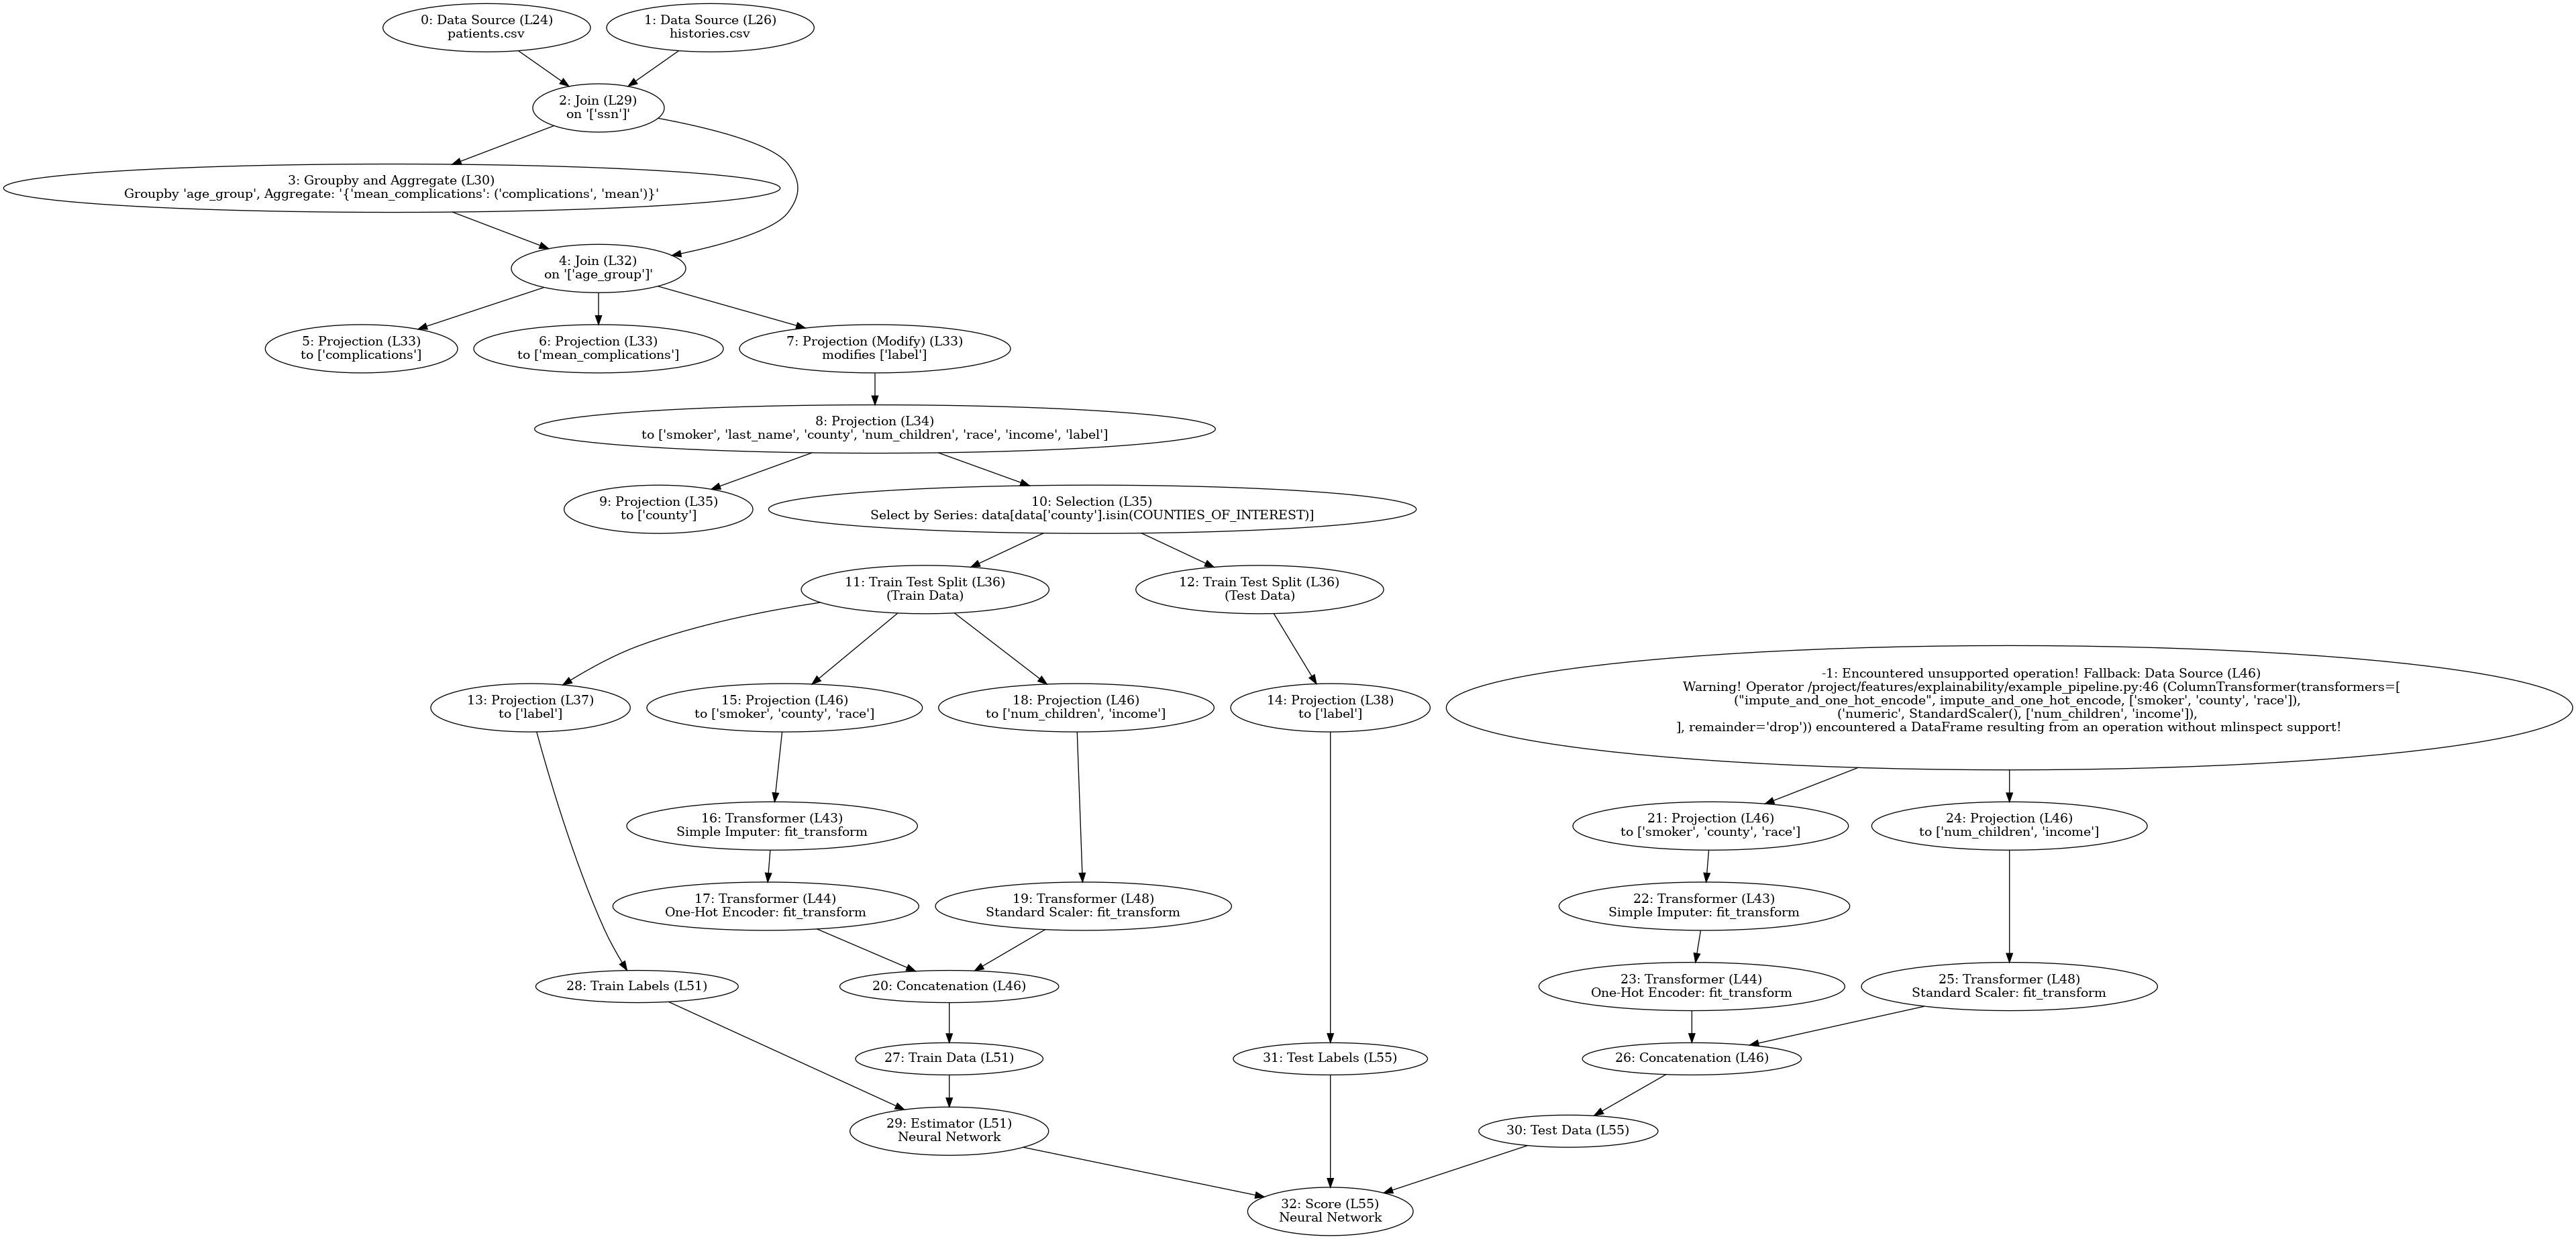

In [2]:
from IPython.display import Image
from mlinspect.visualisation import save_fig_to_path

filename = os.path.join(str(get_project_root()), "features", "explainability", "explainability.png")
save_fig_to_path(extracted_dag, filename)

Image(filename=filename)

In [6]:
from IPython.display import display

check_result_df = PipelineInspector.check_results_as_data_frame(check_results)
display(check_result_df)

,check_name,status,description


In [4]:
from IPython.display import display

relevant_nodes = [node for node in extracted_dag.nodes if node.node_id in {17, 18}]

for dag_node in relevant_nodes:
    print("\n\033[1m{} ({})\033[0m\n{}\n{}".format(
        dag_node.operator_info.operator,
        dag_node.details.description,
        dag_node.optional_code_info.source_code,
        dag_node.optional_code_info.code_reference))
    materialize_inspection_result = dag_node_to_inspection_results[dag_node][MaterializeFirstOutputRows(5)]
    display(materialize_inspection_result)


OperatorType.TRANSFORMER (One-Hot Encoder: fit_transform)
OneHotEncoder(sparse=False, handle_unknown='ignore')
CodeReference(lineno=44, col_offset=15, end_lineno=44, end_col_offset=67)


,array
0,"[0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]"
1,"[0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]"
2,"[0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0]"
3,"[1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0]"
4,"[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0]"



OperatorType.PROJECTION (to ['num_children', 'income'])
ColumnTransformer(transformers=[
    ("impute_and_one_hot_encode", impute_and_one_hot_encode, ['smoker', 'county', 'race']),
    ('numeric', StandardScaler(), ['num_children', 'income']),
], remainder='drop')
CodeReference(lineno=46, col_offset=16, end_lineno=49, end_col_offset=20)


,num_children,income
0,1,338254.5
1,0,83352.0
2,2,183589.5
3,1,178207.5
4,3,58095.0
